In [1]:
#Data from https://www.kaggle.com/saicharankomati/dataco-supply-chain-dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
#Had issues loading the original csv in, so using a pickle in its place.
df = pd.read_pickle(r'C:/Users/admin/OneDrive/Documents/Continued Education/Thinkful/Data Science Flex/Capstone 2/DataCoSupplyChainDataset.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [3]:
#Will get to know the data first before I do any manipulation. I would like to see whether a decision tree or random forest model is better for classifying orders that are delivered late and also whether OLS or KNN produces a better regression model for predicting the actual number of days required for shipping.
df.Type.value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [4]:
df['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [5]:
df.isna()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
180515,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
180516,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
180517,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [6]:
#Dropping features that I for sure won't use.
df.drop(columns = ['Product Description', 'Product Image'], inplace = True)

In [7]:
df['Product Status'].value_counts()

0    180519
Name: Product Status, dtype: int64

In [8]:
#Everything appears to be out of stock
df.Market.value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [9]:
#5 total markets
df['Late_delivery_risk'].describe()

count    180519.000000
mean          0.548291
std           0.497664
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Late_delivery_risk, dtype: float64

In [10]:
df['Order Country'].value_counts()

Estados Unidos       24840
Francia              13222
M�xico               13172
Alemania              9564
Australia             8497
                     ...  
Guinea Ecuatorial        2
Eritrea                  2
Kuwait                   2
Burundi                  1
Serbia                   1
Name: Order Country, Length: 164, dtype: int64

In [11]:
df['Order Country'].nunique()

164

In [12]:
df['Days for shipment (scheduled)'].describe()

count    180519.000000
mean          2.931847
std           1.374449
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: Days for shipment (scheduled), dtype: float64

In [13]:
df['Days for shipping (real)'].describe()

count    180519.000000
mean          3.497654
std           1.623722
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Days for shipping (real), dtype: float64

In [14]:
df['Order Zipcode'].isna()

0         True
1         True
2         True
3         True
4         True
          ... 
180514    True
180515    True
180516    True
180517    True
180518    True
Name: Order Zipcode, Length: 180519, dtype: bool

In [15]:
df.head(20)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajast�n,PENDING,NaN,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajast�n,CLOSED,NaN,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,Queensland,CANCELED,NaN,1360,73,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,Guangdong,COMPLETE,NaN,1360,73,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,Guangdong,PROCESSING,NaN,1360,73,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,Guangdong,CLOSED,NaN,1360,73,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,Guangdong,CLOSED,NaN,1360,73,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [16]:
df['Order Region'].value_counts()

Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order Region, dtype: int64

In [17]:
df['Days for shipment (scheduled)'].value_counts()

4    107752
2     35216
1     27814
0      9737
Name: Days for shipment (scheduled), dtype: int64

In [18]:
df['Days for shipping (real)'].value_counts()

2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: Days for shipping (real), dtype: int64

In [19]:
df['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

In [20]:
#More than half the orders are delivered late.
df['Shipping Mode'].value_counts()

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

In [21]:
#4 different speeds for shipping
df['Product Name'].value_counts()

Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
                                                 ...  
Stiga Master Series ST3100 Competition Indoor       27
SOLE E35 Elliptical                                 15
Bushnell Pro X7 Jolt Slope Rangefinder              11
Bowflex SelectTech 1090 Dumbbells                   10
SOLE E25 Elliptical                                 10
Name: Product Name, Length: 118, dtype: int64

In [22]:
df['Order Country'][0]

'Indonesia'

In [23]:
df['Customer Country'][0]

'Puerto Rico'

In [24]:
df[df['Customer Country'] == 'Puerto Rico']['Market']

0         Pacific Asia
1         Pacific Asia
4         Pacific Asia
6         Pacific Asia
8         Pacific Asia
              ...     
180509    Pacific Asia
180510    Pacific Asia
180512    Pacific Asia
180517    Pacific Asia
180518    Pacific Asia
Name: Market, Length: 69373, dtype: object

In [25]:
df[df['Order Country'] == 'Estados Unidos']

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
55,PAYMENT,2,2,22.410000,74.680000,Shipping on time,0,13,Electronics,Caguas,...,Washington,PENDING_PAYMENT,99301.0,278,13,Under Armour Men's Compression EV SL Slide,44.990002,0,6/13/2016 15:12,Second Class
56,PAYMENT,5,2,25.240000,90.150002,Late delivery,1,12,Boxing & MMA,Caguas,...,California,PENDING_PAYMENT,90049.0,249,12,Under Armour Women's Micro G Skulpt Running S,54.970001,0,8/29/2016 21:45,Second Class
57,PAYMENT,6,2,30.570000,117.580002,Late delivery,1,17,Cleats,Caguas,...,California,PENDING_PAYMENT,94110.0,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,4/19/2016 10:12,Second Class
58,PAYMENT,4,2,46.070000,95.980003,Late delivery,1,17,Cleats,Caguas,...,Kansas,PENDING_PAYMENT,66212.0,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,5/26/2016 14:10,Second Class
183,TRANSFER,5,4,28.850000,128.220001,Shipping canceled,0,13,Electronics,Freeport,...,Texas,SUSPECTED_FRAUD,77041.0,278,13,Under Armour Men's Compression EV SL Slide,44.990002,0,5/13/2016 17:42,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179402,TRANSFER,5,4,-178.440002,101.970001,Late delivery,1,44,Hunting & Shooting,Caguas,...,California,PROCESSING,94110.0,977,44,ENO Atlas Hammock Straps,29.990000,0,8/21/2016 3:32,Standard Class
179403,TRANSFER,3,4,28.799999,230.360001,Shipping canceled,0,17,Cleats,Rio Grande,...,California,SUSPECTED_FRAUD,94122.0,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,7/12/2016 3:57,Standard Class
179404,TRANSFER,5,4,70.190002,215.960007,Shipping canceled,0,17,Cleats,Caguas,...,Kentucky,SUSPECTED_FRAUD,42420.0,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,5/10/2016 17:52,Standard Class
179405,TRANSFER,3,4,-121.800003,174.000000,Shipping canceled,0,24,Women's Apparel,Rio Grande,...,California,SUSPECTED_FRAUD,94122.0,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,7/12/2016 3:57,Standard Class


In [26]:
df['Customer Country'].value_counts()

EE. UU.        111146
Puerto Rico     69373
Name: Customer Country, dtype: int64

In [27]:
#Orders were exclusively placed in USA (in the continental US and Puerto Rico)
df['Customer State'].value_counts()

PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1
Name: Customer State, dtype: int64

In [28]:
df[df['Customer Country'] != 'Puerto Rico']['Order Country']

2             India
3         Australia
5         Australia
7             China
9             China
            ...    
180511        China
180513        China
180514        China
180515        Jap�n
180516    Australia
Name: Order Country, Length: 111146, dtype: object

In [29]:
df[df['Customer Country'] != 'Puerto Rico']['Order Country'].value_counts()

Estados Unidos       15442
M�xico                8095
Francia               7969
Alemania              5807
Australia             5277
                     ...  
Eritrea                  2
Laos                     1
Serbia                   1
Burundi                  1
Guinea Ecuatorial        1
Name: Order Country, Length: 160, dtype: int64

In [30]:
df[df['Order Country'] == 'Puerto Rico'].count()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [31]:
df[df['Customer Country'] == df['Order Country']]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


In [32]:
df['Order State'].value_counts()

Inglaterra                     6722
California                     4966
Isla de Francia                4580
Renania del Norte-Westfalia    3303
San Salvador                   3055
                               ... 
Aomori                            1
Vrancea                           1
Iringa                            1
Mashonalandia Occidental          1
Bistrita-Nasaud                   1
Name: Order State, Length: 1089, dtype: int64

In [33]:
df[df['Order Country'] == 'Indonesia']['Order City'].value_counts()

Yakarta            1006
Surabaya            416
Medan               352
Depok               301
Bandung             278
Semarang            205
Bekasi              180
Palembang           127
Samarinda           111
Bogor               110
Yogyakarta           84
Malang               76
Pekanbaru            67
Denpasar             67
Kendari              65
Balikpapan           59
Surakarta            54
Padang               51
Cirebon              45
Manado               45
Tasikmalaya          43
Jambi                41
Pematangsiantar      41
Kupang               37
Jember               36
Probolinggo          32
Pontianak            30
Dumai                29
Tegal                28
Banjarmasin          25
Mataram              23
Binjai               22
Banda Aceh           19
Jayapura             17
Kediri               15
Ambon                12
Purwokerto           12
Pekalongan           11
Palu                 10
Sukabumi              9
Tangerang             8
Bengkulu        

In [34]:
df[df['Order Country'] == 'Estados Unidos']['Order City'].value_counts()

New York City    2202
Los Angeles      1845
Philadelphia     1302
San Francisco    1297
Seattle          1066
                 ... 
Missoula            1
Ormond Beach        1
Atlantic City       1
Pico Rivera         1
Tinley Park         1
Name: Order City, Length: 510, dtype: int64

In [35]:
df[df['Order Country'] == 'Estados Unidos']['Customer City'].value_counts()

Caguas            9102
Los Angeles        553
Chicago            551
Brooklyn           509
New York           244
                  ... 
Citrus Heights       2
Stafford             2
Bartlett             1
Oakland              1
Freehold             1
Name: Customer City, Length: 554, dtype: int64

In [36]:
df[df['Order City'] == df['Customer City']]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
4682,DEBIT,4,4,46.389999,159.960007,Shipping on time,0,29,Shop By Sport,Santa Ana,...,Santa Ana,COMPLETE,NaN,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,4/1/2017 11:59,Standard Class
5431,TRANSFER,6,4,18.889999,44.980000,Shipping canceled,0,36,Golf Balls,Newark,...,Ohio,CANCELED,43055.0,810,36,Glove It Women's Mod Oval Golf Glove,19.990000,0,4/10/2016 10:44,Standard Class
8375,DEBIT,4,4,-15.790000,83.989998,Shipping on time,0,9,Cardio Equipment,Los Angeles,...,California,COMPLETE,90004.0,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,0,5/11/2016 13:19,Standard Class
9384,DEBIT,6,4,-34.430000,484.950012,Late delivery,1,9,Cardio Equipment,Los Angeles,...,California,COMPLETE,90049.0,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,0,8/5/2016 3:44,Standard Class
10281,TRANSFER,4,4,65.339996,208.770004,Shipping on time,0,17,Cleats,Los Angeles,...,California,PROCESSING,90045.0,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,7/5/2016 15:52,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171993,TRANSFER,6,4,-87.940002,119.970001,Shipping canceled,0,29,Shop By Sport,Los Angeles,...,California,CANCELED,90032.0,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,7/28/2016 1:18,Standard Class
171996,TRANSFER,2,4,128.509995,377.959992,Advance shipping,0,9,Cardio Equipment,Philadelphia,...,Pensilvania,PENDING,19120.0,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,0,7/8/2016 2:01,Standard Class
172271,TRANSFER,2,4,76.489998,224.960007,Advance shipping,0,17,Cleats,Philadelphia,...,Pensilvania,PENDING,19120.0,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,7/8/2016 2:01,Standard Class
177545,TRANSFER,4,4,13.820000,72.720001,Shipping on time,0,40,Accessories,Seattle,...,Washington,PROCESSING,98115.0,906,40,Team Golf Tennessee Volunteers Putter Grip,24.990000,0,4/16/2016 14:14,Standard Class


In [37]:
df[df['Order City'] == df['Customer City']]['Order City']

4682         Santa Ana
5431            Newark
8375       Los Angeles
9384       Los Angeles
10281      Los Angeles
              ...     
171993     Los Angeles
171996    Philadelphia
172271    Philadelphia
177545         Seattle
177761            Rome
Name: Order City, Length: 129, dtype: object

In [38]:
df[df['Customer Country'] == 'Puerto Rico']['Customer City']

0         Caguas
1         Caguas
4         Caguas
6         Caguas
8         Caguas
           ...  
180509    Caguas
180510    Caguas
180512    Caguas
180517    Caguas
180518    Caguas
Name: Customer City, Length: 69373, dtype: object

In [39]:
df[df['Customer Country'] == 'Puerto Rico']['Order City']

0             Bekasi
1            Bikaner
4         Townsville
6          Guangzhou
8          Guangzhou
             ...    
180509     Guangshui
180510     Guangshui
180512       Chengdu
180517      Adelaide
180518     Nagercoil
Name: Order City, Length: 69373, dtype: object

In [40]:
df[df['Order City'] == df['Customer City']]['Order City'].value_counts()

Los Angeles      46
Chicago          21
Miami             9
Philadelphia      8
Houston           8
Columbus          5
Santa Ana         5
Rome              5
Newark            4
Austin            3
San Diego         3
Marion            3
San Francisco     3
Seattle           2
Aurora            2
Louisville        1
San Antonio       1
Name: Order City, dtype: int64

In [41]:
uscc = df[df['Order Country'] == 'Estados Unidos']['Customer City']

In [42]:
usoc = df[df['Order Country'] == 'Estados Unidos']['Order City']

In [43]:
uscc.nunique()

554

In [44]:
usoc.nunique()

510

In [45]:
print(uscc)

55            Caguas
56            Caguas
57            Caguas
58            Caguas
183         Freeport
             ...    
179402        Caguas
179403    Rio Grande
179404        Caguas
179405    Rio Grande
179406        Caguas
Name: Customer City, Length: 24840, dtype: object


In [46]:
df[df['Order Country'] == 'Puerto Rico']

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


In [47]:
#Given that there aren't many meaningful, quantifiable feastures, I will convert 2 categorical features to numeric and filter the countries as USA versus all others by creating an international feature with dummies.
df['International'] = np.where(df['Order Country'] == 'Estados Unidos', 0, 1)

In [48]:
#Replacing the 4 different shipping mode methods with numbers to indicate their relative speed
df['Shipping Mode Speed'] = df['Shipping Mode'].replace(to_replace = 'Same Day', value = 4)

In [49]:
df['Shipping Mode Speed'].replace(to_replace = 'First Class', value = 3, inplace = True)

In [50]:
df['Shipping Mode Speed'].replace(to_replace = 'Second Class', value = 2, inplace = True)

In [51]:
df['Shipping Mode Speed'].replace(to_replace = 'Standard Class', value = 1, inplace = True)

In [52]:
df['Shipping Mode Speed'].value_counts()

1    107752
2     35216
3     27814
4      9737
Name: Shipping Mode Speed, dtype: int64

In [53]:
#Replacing the 4 different payment types with numbers to indicate their relative speed
df['Payment Type'] = df['Type'].replace(to_replace = 'CASH', value = 4)

In [54]:
df['Payment Type'].replace(to_replace = 'DEBIT', value = 3, inplace = True)

In [55]:
df['Payment Type'].replace(to_replace = 'TRANSFER', value = 2, inplace = True)

In [56]:
df['Payment Type'].replace(to_replace = 'PAYMENT', value = 1, inplace = True)

In [57]:
df['Payment Type'].value_counts()

3    69295
2    49883
1    41725
4    19616
Name: Payment Type, dtype: int64

In [58]:
df[df['Delivery Status'] == 'Late delivery']['Late_delivery_risk'].describe()

count    98977.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Late_delivery_risk, dtype: float64

In [59]:
#Creating new dataframes for the model implementation
order = pd.DataFrame()
late = pd.DataFrame()

In [60]:
late['Late'] = df['Late_delivery_risk']

In [61]:
order['Scheduled Shipping'] = df['Days for shipment (scheduled)']

In [62]:
order['Shipping Mode'] = df['Shipping Mode Speed']

In [63]:
order['International'] = df['International']

In [64]:
order['Payment Type'] = df['Payment Type']

In [65]:
late['Late'].value_counts()

1    98977
0    81542
Name: Late, dtype: int64

In [66]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [67]:
#Looking at the normality of the distributions according to statistical tests.
jb_stats = jarque_bera(order['Shipping Mode'])
norm_stats = normaltest(order['Shipping Mode'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(order['Payment Type'])
norm_stats = normaltest(order['Payment Type'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(order['Scheduled Shipping'])
norm_stats = normaltest(order['Scheduled Shipping'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 37763.178793247906 and p value is 0.0
Normality test statistics is 25241.662580831842 and p value is 0.0
Jarque-Bera test statistics is 7940.735090331606 and p value is 0.0
Normality test statistics is 47154.42753066561 and p value is 0.0
Jarque-Bera test statistics is 23991.611644183176 and p value is 0.0
Normality test statistics is 60118.9857522883 and p value is 0.0


In [68]:
#The 3 selected features don't have normal distributions according to the Jarque-Bera and Normality tests.

In [69]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

In [70]:
#Naming predicted and actual values 'a' and 'b' to avoid confusion with X and Y(already have enough of those).
#The first function is for decision tree precision.
def prec(a, b):
    micro_precision = precision_score(a, b, average='micro')
    print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

    macro_precision = precision_score(a, b, average='macro')
    print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

    per_class_precision = precision_score(a, b, average=None)
    print('Per-class precision score:', per_class_precision)

In [71]:
#The second function is for decision tree recall.
def rec(a, b):
    micro_recall = recall_score(a, b, average='micro')
    print('Micro-averaged recall score: {0:0.2f}'.format(
      micro_recall))

    macro_recall = recall_score(a, b, average='macro')
    print('Macro-averaged recall score: {0:0.2f}'.format(
      macro_recall))

    per_class_recall = recall_score(a, b, average=None)
    print('Per-class recall score:', per_class_recall)

In [72]:
#The third function is for decision tree F1.
def f1s(a, b):
    micro_f1 = f1_score(a, b, average='micro')
    print('Micro-averaged f1 score: {0:0.2f}'.format(
      micro_f1))

    macro_f1 = f1_score(a, b, average='macro')
    print('Macro-averaged f1 score: {0:0.2f}'.format(
      macro_f1))

    per_class_f1 = f1_score(a, b, average=None)
    print('Per-class f1 score:', per_class_f1)

In [73]:
X = order
Y = late

In [74]:
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [75]:
#Establishing the baseline for the classification model.
from sklearn.dummy import DummyClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y)
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(Xtrain, ytrain)
dummy.score(Xtest, ytest)

0.5481054730777754

In [76]:
#Baseline accuracy is established at 0.55.
dummy_report = classification_report(ytest, dummy.predict(Xtest), target_names=['Late', 'On Time'])
print(dummy_report)

              precision    recall  f1-score   support

        Late       0.00      0.00      0.00     20394
     On Time       0.55      1.00      0.71     24736

    accuracy                           0.55     45130
   macro avg       0.27      0.50      0.35     45130
weighted avg       0.30      0.55      0.39     45130



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


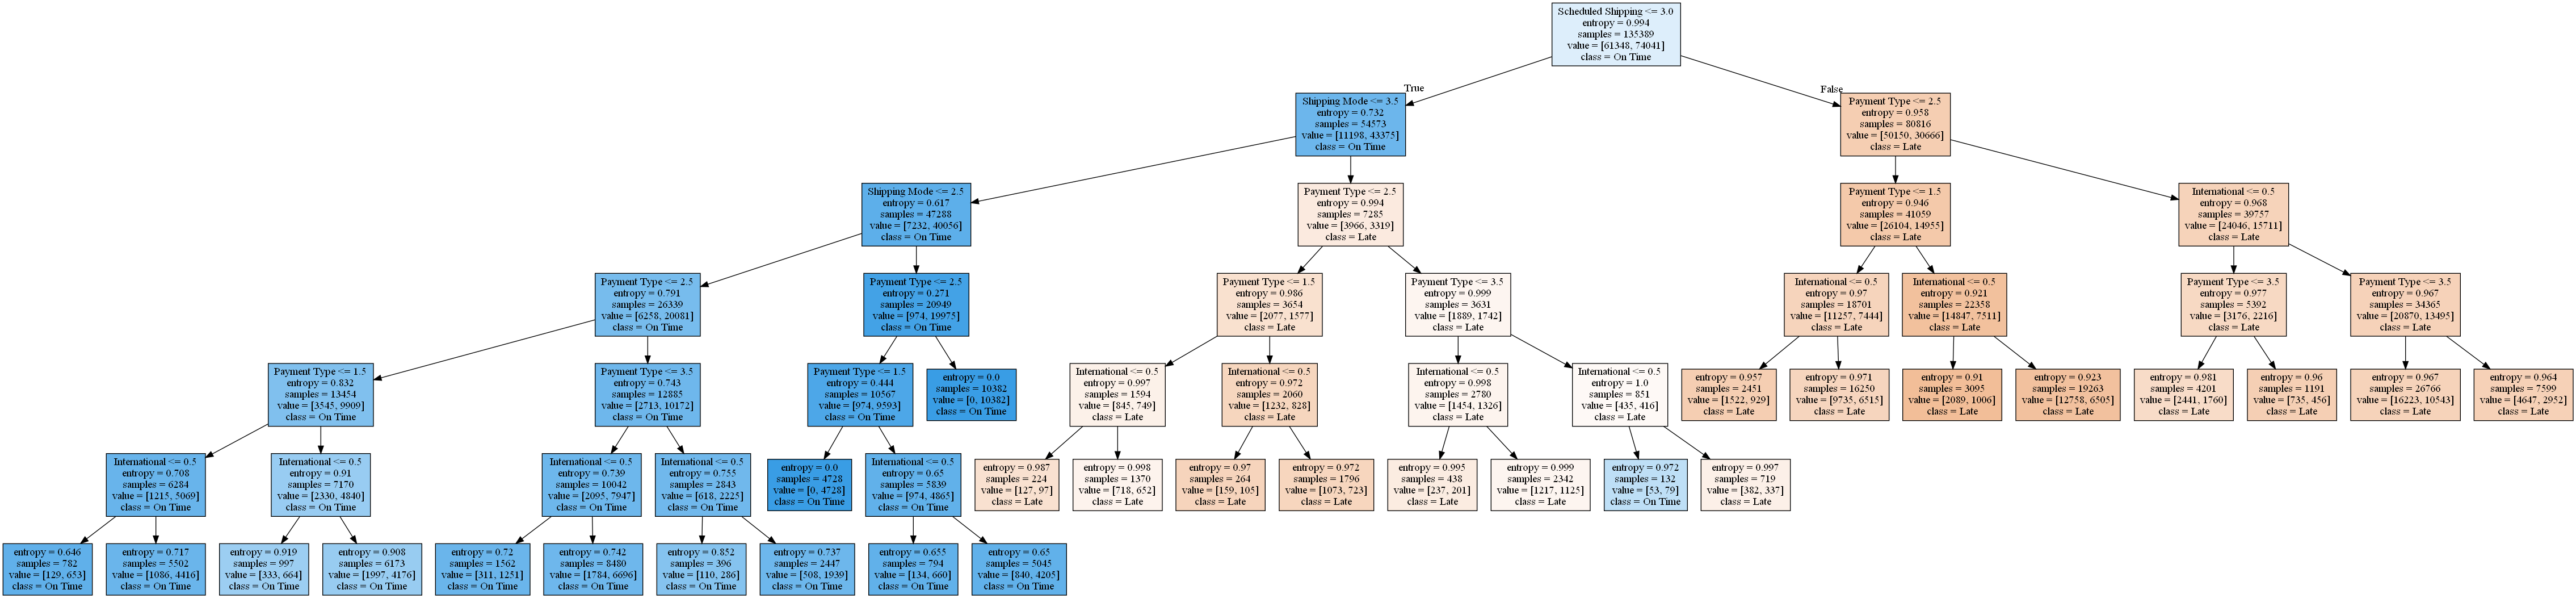

In [77]:
#Tree with no tuning
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy'
)
X_traind, X_testd, y_traind, y_testd = train_test_split(X, Y)
decision_tree.fit(X_traind, y_traind)

#Render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=order.columns,
    class_names=['Late', 'On Time'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [78]:
#Accuracy of the first decision tree
decision_tree.score(X_testd, y_testd)

0.6945047640150676

In [79]:
y_pred = decision_tree.predict(X_testd)

In [80]:
#Precision of the first decision tree
prec(y_pred, y_testd)

Micro-averaged precision score: 0.69
Macro-averaged precision score: 0.71
Per-class precision score: [0.88541151 0.53990215]


In [81]:
#Recall of the first decision tree
rec(y_pred, y_testd)

Micro-averaged recall score: 0.69
Macro-averaged recall score: 0.73
Per-class recall score: [0.60913706 0.8533308 ]


In [82]:
#F1 of the first decision tree
f1s(y_pred, y_testd)

Micro-averaged f1 score: 0.69
Macro-averaged f1 score: 0.69
Per-class f1 score: [0.72173895 0.66136124]


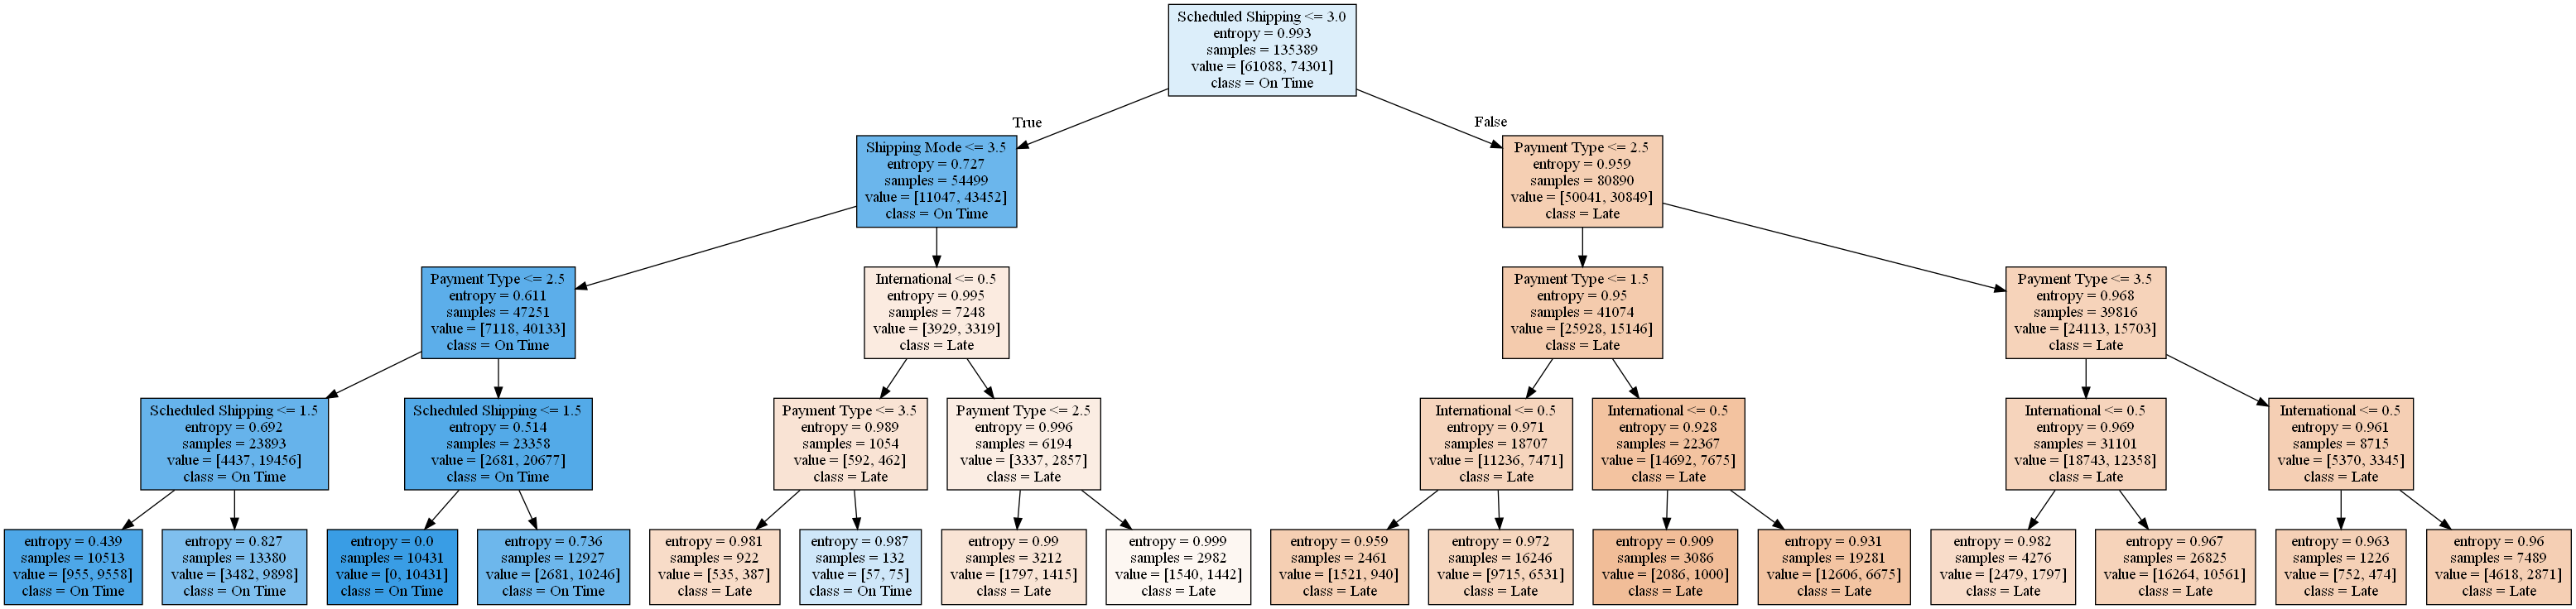

In [83]:
#Tree with some tuning
decision_tree1 = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 1,
    max_depth = 4,
    min_samples_split = 2,
    random_state = 42
)
X_traind1, X_testd1, y_traind1, y_testd1 = train_test_split(X, Y)
decision_tree1.fit(X_traind1, y_traind1)

dot_data = tree.export_graphviz(
    decision_tree1, out_file=None,
    feature_names=order.columns,
    class_names=['Late', 'On Time'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [84]:
#Accuracy of the tuned decision tree
decision_tree1.score(X_testd1, y_testd1)

0.6962109461555507

In [85]:
y_pred1 = decision_tree1.predict(X_testd1)

In [86]:
#Precision of the tuned decision tree
prec(y_pred1, y_testd1)

Micro-averaged precision score: 0.70
Macro-averaged precision score: 0.71
Per-class precision score: [0.88149017 0.54263252]


In [87]:
#Recall of the tuned decision tree
rec(y_pred1, y_testd1)

Micro-averaged recall score: 0.70
Macro-averaged recall score: 0.73
Per-class recall score: [0.61502251 0.8467181 ]


In [88]:
#F1 of the tuned decision tree
f1s(y_pred1, y_testd1)

Micro-averaged f1 score: 0.70
Macro-averaged f1 score: 0.69
Per-class f1 score: [0.72453285 0.66139788]


In [89]:
#Using GridSearchCV to optimize the Decision Tree Model
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [2,6],
    'min_samples_leaf': [1,6],
    'random_state': [42,100],
          }

In [91]:
dt = DecisionTreeClassifier()

In [92]:
decision_treer = GridSearchCV(estimator = dt, param_grid = parameters, cv = 3, verbose = 2, n_jobs = 4)
X_traindr, X_testdr, y_traindr, y_testdr = train_test_split(X, Y)
decision_treer.fit(X_traindr, y_traindr)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    5.8s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 6],
                         'min_samples_split': [2, 6],
                         'random_state': [42, 100]},
             verbose=2)

In [93]:
decision_treer.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

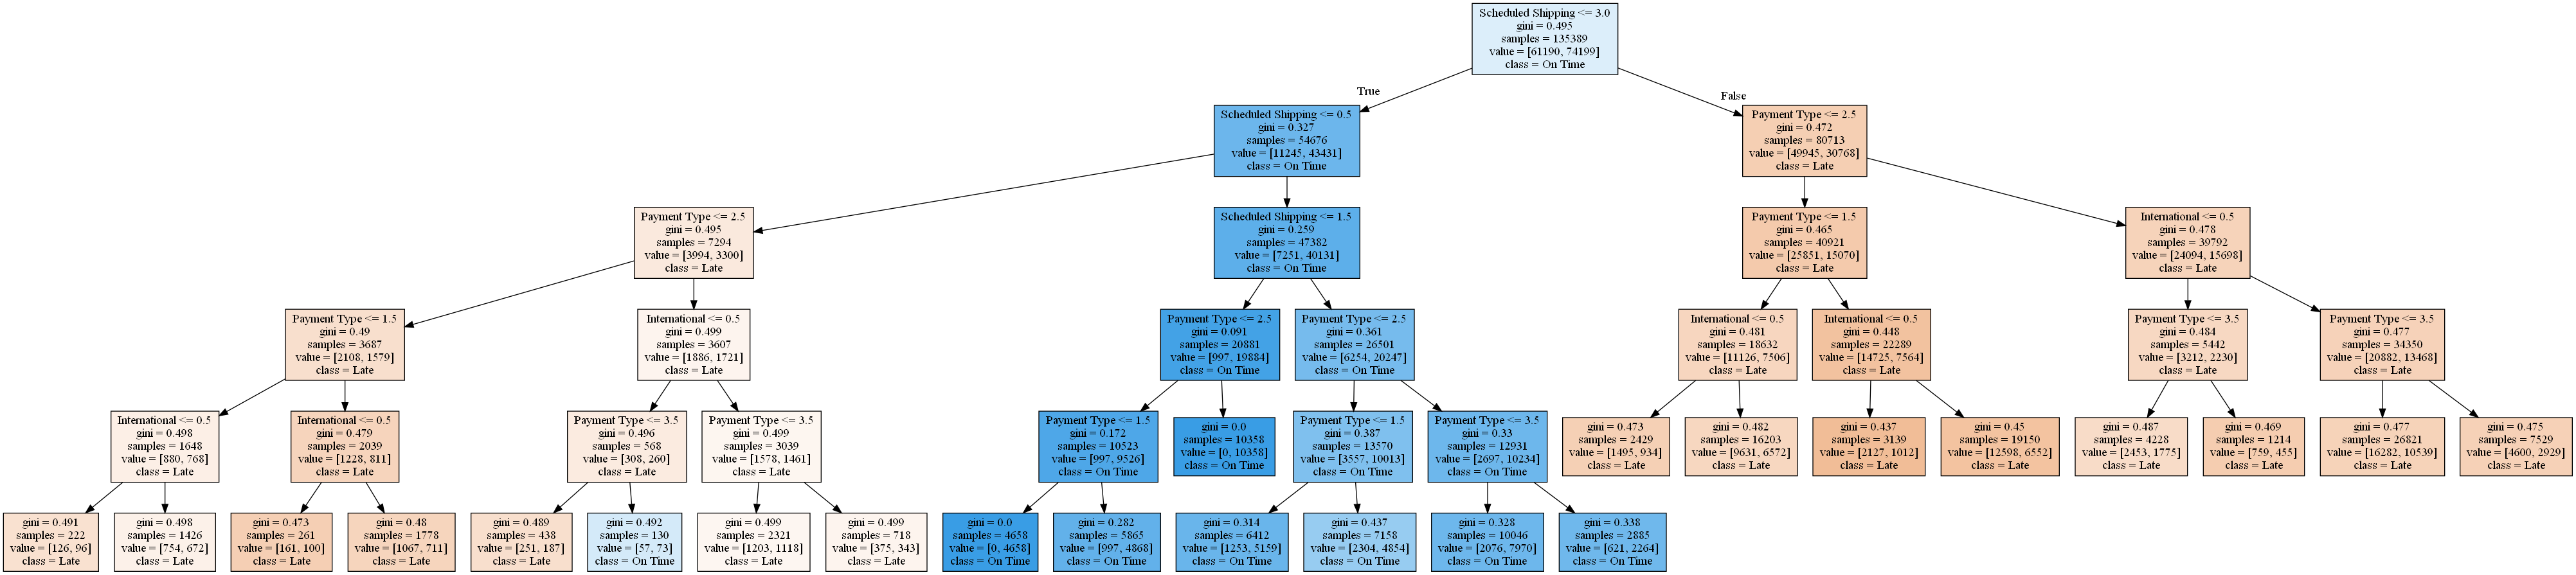

In [94]:
#Decision tree tuned with best parameters
decision_treert = tree.DecisionTreeClassifier(
    max_depth = 5,
    random_state = 42
)
X_traindrt, X_testdrt, y_traindrt, y_testdrt = train_test_split(X, Y)
decision_treert.fit(X_traindrt, y_traindrt)

dot_data = tree.export_graphviz(
    decision_treert, out_file=None,
    feature_names=order.columns,
    class_names=['Late', 'On Time'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [95]:
#Accuracy of the grid-tuned decision tree
print(f'Train Accuracy - : {decision_treert.score(X_traindrt, y_traindrt):.3f}')
print(f'Test Accuracy - : {decision_treert.score(X_testdrt, y_testdrt):.3f}')

Train Accuracy - : 0.695
Test Accuracy - : 0.697


In [96]:
y_predrt = decision_treer.predict(X_testdrt)

In [97]:
#Precision of the grid-tuned decision tree
prec(y_predrt, y_testdrt)

Micro-averaged precision score: 0.70
Macro-averaged precision score: 0.71
Per-class precision score: [0.88743121 0.54056017]


In [98]:
#Recall of the grid-tuned decision tree
rec(y_predrt, y_testdrt)

Micro-averaged recall score: 0.70
Macro-averaged recall score: 0.73
Per-class recall score: [0.61338088 0.85393688]


In [99]:
#F1 of the grid-tuned decision tree
f1s(y_predrt, y_testdrt)

Micro-averaged f1 score: 0.70
Macro-averaged f1 score: 0.69
Per-class f1 score: [0.72538506 0.66203692]


In [100]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [102]:
#Moving onto random forest model
rfc = ensemble.RandomForestClassifier()
X = order
Y = late['Late']
X = X.dropna()

In [103]:
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X, Y)

In [104]:
rfc.fit(X_trainr, y_trainr)

RandomForestClassifier()

In [105]:
lpred = rfc.predict(X_testr)
report = classification_report(y_testr, lpred)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.88      0.72     20397
           1       0.85      0.54      0.66     24733

    accuracy                           0.70     45130
   macro avg       0.73      0.71      0.69     45130
weighted avg       0.74      0.70      0.69     45130



In [106]:
cross_val_score(rfc, X, Y, cv=3)

array([0.72220099, 0.67003473, 0.68038821])

In [107]:
rfc_avg_score = (0.72220099+0.67003473+0.68038821)/3
print(rfc_avg_score)

0.6908746433333333


In [108]:
def pcm(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [109]:
cm = confusion_matrix(y_testr, lpred, labels = [1,0])

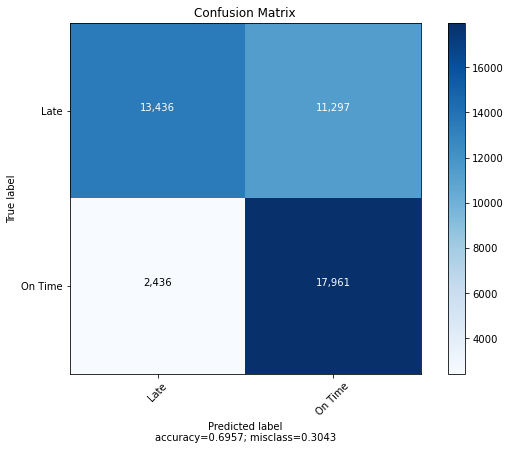

In [110]:
pcm(cm = cm, target_names = ['Late', 'On Time'], title = 'Confusion Matrix',normalize=False)

In [111]:
#Using GridSearchCV to optimize the Random Forest Model
X_traing, X_testg, y_traing, y_testg = train_test_split(X, Y)

In [112]:
params = {'max_depth': [2,3,4,5,6],
'min_samples_split': [2,6],
'min_samples_leaf': [1,6],
'random_state': [42,100],
'bootstrap': [True,False]
          }

In [113]:
rf = RandomForestClassifier()

In [114]:
rfg = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose = 2, n_jobs = 4)

In [115]:
rfg.fit(X_traing, y_traing)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   21.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  2.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 6],
                         'min_samples_split': [2, 6],
                         'random_state': [42, 100]},
             verbose=2)

In [116]:
rfg.best_params_

{'bootstrap': True,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [117]:
print(f'Train Accuracy - : {rfg.score(X_traing, y_traing):.3f}')
print(f'Test Accuracy - : {rfg.score(X_testg, y_testg):.3f}')

Train Accuracy - : 0.694
Test Accuracy - : 0.698


In [118]:
l_pred = rfg.predict(X_testg)
report_g = classification_report(y_testg, l_pred)
print(report_g)

              precision    recall  f1-score   support

           0       0.62      0.88      0.73     20419
           1       0.85      0.55      0.66     24711

    accuracy                           0.70     45130
   macro avg       0.73      0.71      0.69     45130
weighted avg       0.74      0.70      0.69     45130



In [119]:
cmg = confusion_matrix(y_testg, l_pred, labels = [1,0])

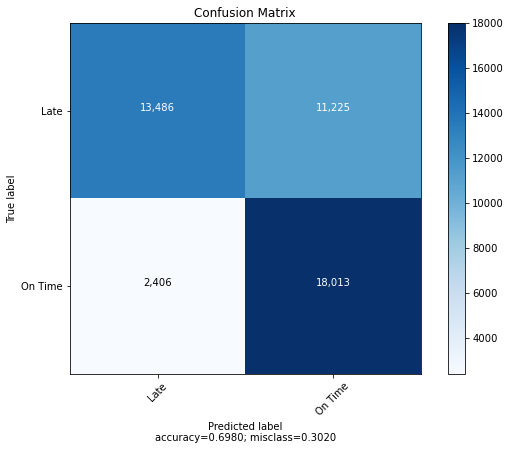

In [120]:
pcm(cm = cmg, target_names = ['Late', 'On Time'], title = 'Confusion Matrix',normalize=False)

In [121]:
#Given the 3 different decision trees and 2 different random forest models, the 2 different random forest models have both higher overall accuracy and higher recall scores for the orders that arrived on time. The random forest that used GridSearchCV to tune hyperparameters had the highest overall scores, making it the best of the 5 classification models. That said, they are all much better than the dummy baseline with 55% accuracy.

In [122]:
#Moving onto regression
Y2 = df['Days for shipping (real)']

In [123]:
import statsmodels.api as sm
pd.options.display.float_format = '{:.3f}'.format

In [124]:
X2 = sm.add_constant(X)

In [125]:
results = sm.OLS(Y2, X2).fit()

In [126]:
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Days for shipping (real)   R-squared:                       0.390
Model:                                  OLS   Adj. R-squared:                  0.390
Method:                       Least Squares   F-statistic:                 2.887e+04
Date:                      Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                              00:40:49   Log-Likelihood:            -2.9901e+05
No. Observations:                    180519   AIC:                         5.980e+05
Df Residuals:                        180514   BIC:                         5.981e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [127]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = .2, random_state = 42)

In [128]:
X2_train = sm.add_constant(X2_train)

In [129]:
results2 = sm.OLS(y2_train, X2_train).fit()
print(results2.summary())

                               OLS Regression Results                               
Dep. Variable:     Days for shipping (real)   R-squared:                       0.390
Model:                                  OLS   Adj. R-squared:                  0.390
Method:                       Least Squares   F-statistic:                 2.310e+04
Date:                      Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                              00:42:08   Log-Likelihood:            -2.3921e+05
No. Observations:                    144415   AIC:                         4.784e+05
Df Residuals:                        144410   BIC:                         4.785e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [130]:
X2_test = sm.add_constant(X2_test)
y_pred = results2.predict(X2_test)

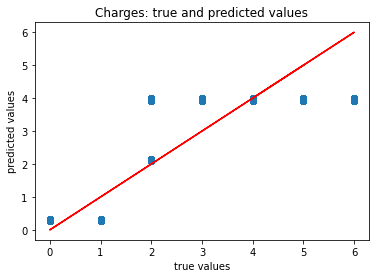

Mean absolute error of the prediction is: 1.001546354763473
Mean squared error of the prediction is: 1.6072591601371284
Root mean squared error of the prediction is: 1.2677772517824764
Mean absolute percentage error of the prediction is: inf


In [131]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

plt.scatter(y2_test, y_pred)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y2_test, y_pred)))
print("Mean squared error of the prediction is: {}".format(mse(y2_test, y_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(y2_test, y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y2_test - y_pred) / y2_test)) * 100))

In [132]:
#Error term's expected value is 0.
errors = y2_test - y_pred

print("Mean of the errors in the shipping days model is: {}".format(np.mean(errors)))

Mean of the errors in the shipping days model is: 0.00016659095260349613


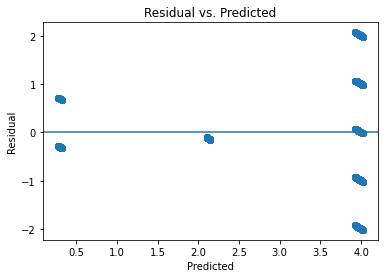

In [133]:
plt.scatter(y_pred, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [134]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(y_pred, errors)
lev_stats = levene(y_pred, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 1759.47 and p value is 0
Levene test statistic value is 5574.12 and p value is 0


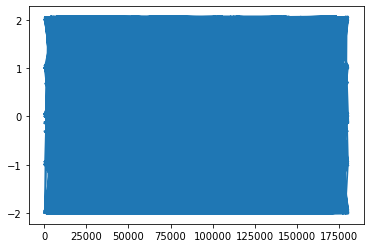

In [135]:
#The distrubution of the errors is heteroscedastic, so checking the error correlation next.
plt.plot(errors)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


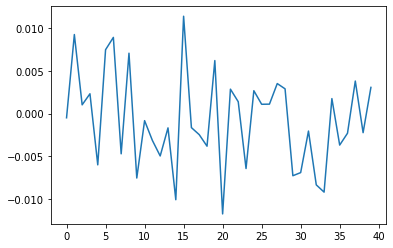

In [136]:
#Errors are overwhelmingly uniformly distributed.
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

In [137]:
#Autocorrelation between the errors is very low.
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [138]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1230.5565495102142 and p value is 0.0
Normality test statistics is 5009.867788010889 and p value is 0.0


In [139]:
#The errors aren't normally distributed. The OLS meets some of the assumptions of linear regression, but not all.

In [140]:
from sklearn import neighbors

In [142]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)

In [143]:
X3 = X

In [144]:
X_traink, X_testk, y_traink, y_testk = train_test_split(X, Y2)

In [145]:
knn.fit(X_traink, y_traink)

KNeighborsRegressor(n_neighbors=10)

In [146]:
yk = knn.predict(X_testk)

In [147]:
from statsmodels.tools.eval_measures import mse, rmse

In [148]:
print("Mean squared error of the knn prediction is: {}".format(mse(y_testk, yk)))

Mean squared error of the knn prediction is: 1.6571400398847773


In [149]:
#Weighting the regression using 50 neighbors
knn_w = neighbors.KNeighborsRegressor(n_neighbors=50, weights='distance')

In [150]:
knn_w.fit(X_traink, y_traink)

KNeighborsRegressor(n_neighbors=50, weights='distance')

In [151]:
ykw = knn_w.predict(X_testk)

In [152]:
print("Mean squared error of the knn_w prediction is: {}".format(mse(y_testk, ykw)))

Mean squared error of the knn_w prediction is: 1.6207036472413032


In [153]:
#Using 100 neighbors
knn_w1 = neighbors.KNeighborsRegressor(n_neighbors=100, weights='distance')

In [154]:
knn_w1.fit(X_traink, y_traink)

KNeighborsRegressor(n_neighbors=100, weights='distance')

In [155]:
ykw1 = knn_w1.predict(X_testk)
print("Mean squared error of the knn_w1 prediction is: {}".format(mse(y_testk, ykw1)))

Mean squared error of the knn_w1 prediction is: 1.603547387547086


In [156]:
#The MSE of the OLS regression is 1.6073 whereas the MSE's of the knn regressions are larger. This said, the MSE's of the knn regressions will approach the MSE of the OLS as the number of neighbors gets higher and higher. Until the MSE's of the knn regressions fall below the MSE of the OLS regression, the OLS is the better model.